In [0]:
import keras

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)

(50000, 32, 32, 3)


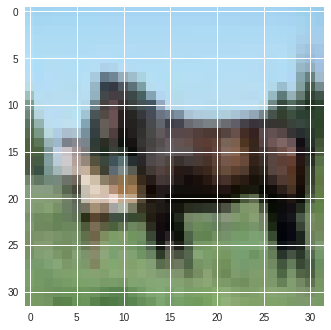

In [0]:
from matplotlib import pyplot as plt
plt.imshow(train_images[12])

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
__________

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64,
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 19s 387us/step - loss: 1.7591 - acc: 0.3613 - val_loss: 1.4967 - val_acc: 0.4392
Epoch 2/5
50000/50000 [==============================] - 16s 328us/step - loss: 1.3555 - acc: 0.5186 - val_loss: 1.4197 - val_acc: 0.5021
Epoch 3/5
50000/50000 [==============================] - 16s 329us/step - loss: 1.2008 - acc: 0.5735 - val_loss: 1.0951 - val_acc: 0.6114
Epoch 4/5
50000/50000 [==============================] - 15s 298us/step - loss: 1.1045 - acc: 0.6102 - val_loss: 1.1952 - val_acc: 0.5818
Epoch 5/5
50000/50000 [==============================] - 9s 189us/step - loss: 1.0261 - acc: 0.6408 - val_loss: 1.0421 - val_acc: 0.6429


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 102us/step
0.6429
